# Of All energy types, which are the most prevalent worldwide?
### Data source: data.UN.org Energy Statistics Database

## i.Data Cleansing

### i.a. Combining & Merging

#### Energy sources are in separate csv files.  Many data sources need to be combined into one.

In [184]:
#combining all datasets using map function

import glob
import pandas as pd 

#map renewables

df_renew = pd.concat(map(pd.read_csv, glob.glob('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/raw_data_renewable/*.csv')))
df_renew.rename(columns={'Country or Area':'Geo'}, inplace=True)

#map nonrenewables

df_nonrenew = pd.concat(map(pd.read_csv, glob.glob('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/raw_data_nonrenewable/*.csv')))
df_nonrenew.rename(columns={'Country or Area':'Geo'}, inplace=True)

df = pd.concat([df_renew, df_nonrenew])

#split commodity and transaction into two columns
#defining column to split and which delimiter
ct = df['Commodity - Transaction'].str.split('-')

#assigning new columns
df['Commodity'] = ct.str.get(0)
df['Transaction'] = ct.str.get(1)

#lowercase and remove trailing and leading spaces
df['Commodity'] = df['Commodity'].str.lower()
df['Commodity'] = df['Commodity'].str.strip()

df['Transaction'] = df['Transaction'].str.lower()
df['Transaction'] = df['Transaction'].str.strip()

df = df[df['Transaction'] == 'production']

#df.shape




In [185]:
#import dataframe with conversion units
import pandas as pd 
unit_conv = pd.read_csv('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/renewable_energy_units_conv_2.csv')

In [186]:
#merge dataframes with conversion units

df_merge = pd.merge(df,  
                     unit_conv,  
                     on ='Commodity', 
                     how ='left') 

df_merge['TJ'] = df_merge['Quantity'] * df_merge['Conv_mt_to_tj']
df_merge.Commodity.unique()

array(['animal waste', 'bagasse', 'biodiesel', 'biogases', 'biogasoline',
       'black liquor', 'charcoal', 'fuelwood', 'geothermal electricity',
       'hydro electricity', 'industrial waste', 'municipal wastes',
       'nuclear electricity', 'other liquid biofuels', 'vegetal waste',
       'solar electricity', 'tide electricity', 'uranium',
       'wind electricity', 'additives and oxygenates', 'anthracite',
       'aviation gasoline', 'bio jet kerosene', 'bitumen',
       'blast furnace gas', 'brown coal', 'brown coal briquettes',
       'coal tar', 'coke oven coke', 'coke oven gas', 'coking coal',
       'conventional crude oil', 'ethane', 'fuel oil', 'gasworks gas',
       'gas coke', 'gas oil/ diesel oil', 'hard coal', 'lignite',
       'liquefied petroleum gas (lpg)', 'lubricants', 'motor gasoline',
       'naphtha', 'natural gas (including lng)', 'natural gas liquids',
       'oil shale', 'other bituminous coal', 'other hydrocarbons',
       'other kerosene', 'other oil produc

## ii.All Energy Sources Metrics 2018

#### All energy sources 'production'

In [187]:

#sum all energy sources by year from 1990 to 2018
lt_2019 = df_merge[df_merge['Year'] < 2019]
tot_grp_year = lt_2019.groupby(['Year'])
df_tot_year = tot_grp_year['TJ'].agg(['sum'])

#sum all renewables
lt_2019_r = df_merge[(df_merge['Year'] < 2019) & (df_merge['r_type'] == 'renewable')]
tot_r_grp_year = lt_2019_r.groupby(['Year'])
df_tot_year_r = tot_r_grp_year['TJ'].agg(['sum'])

#sum all nonrenewables
lt_2019_n = df_merge[(df_merge['Year'] < 2019) & (df_merge['r_type'] == 'nonrenewable')]
tot_n_grp_year = lt_2019_n.groupby(['Year'])
df_tot_year_n = tot_n_grp_year['TJ'].agg(['sum'])

In [188]:
# ***sum renewable & nonrenewable in the same way and change plot below to subplot w/ three lines

In [189]:
allsources_r = pd.merge(df_tot_year,  
                     df_tot_year_r,  
                     on ='Year', 
                     how ='left') 

allsources_r_n = pd.merge(allsources_r,
                    df_tot_year_n,
                    on = 'Year', 
                    how = 'left')

allsources_r_n.rename(columns={'sum_x':'total', 'sum_y': 'renew', 'sum' : 'nonrenew'}, inplace=True)
#allsources_r_n['diff'] = allsources_r_n['renew'] + allsources_r_n['nonrenew']#

allsources_r_n.head()

allsources_r_n.to_csv('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/presentation links/worldwide_trends.csv')

AxesSubplot(0.125,0.125;0.775x0.755)


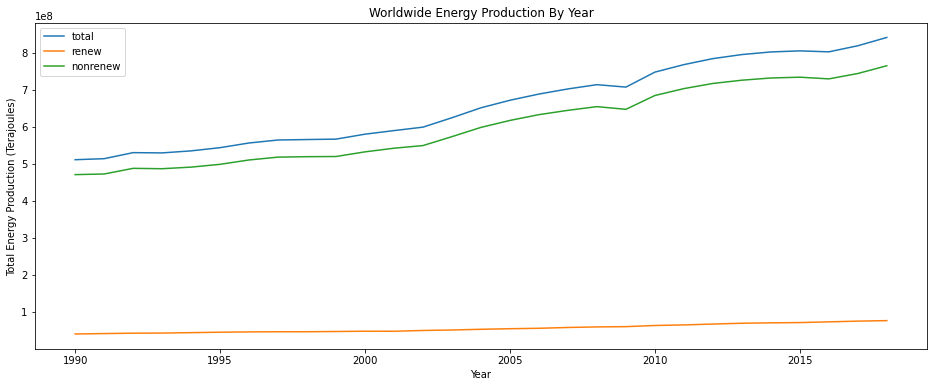

In [190]:
import matplotlib.pyplot as plt 

df_tot_year.sort_values(by='Year', ascending=True, inplace=True)
df_tot_year_r.sort_values(by='Year', ascending=True, inplace=True)
df_tot_year_n.sort_values(by='Year', ascending=True, inplace=True)

fig = allsources_r_n.plot(figsize=(16,6), title='Worldwide Energy Production By Year')
plt.xlabel("Year")
plt.ylabel("Total Energy Production (Terajoules)")
print(fig)

# plt.savefig("C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/presentation links/energybyyear.jpg")


In [191]:
#what was the percent renewable in 2018?

df_r_type_18 = df_merge[df_merge['Year'] == 2018]
r_grp_18 = df_r_type_18.groupby(['r_type'])
sum_r_type_18 = r_grp_18['TJ'].agg(['sum'])
sum_r_type_18['percent'] = (sum_r_type_18['sum'] / sum_r_type_18['sum'].sum()) * 100
sum_r_type_18.head()

,sum,percent
r_type,,
nonrenewable,7.651804e+08,90.920894
renewable,7.640877e+07,9.079106


#### Percent renewable?

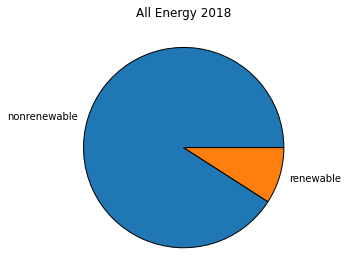

In [192]:
from matplotlib import pyplot as plt 

pie = sum_r_type_18['sum']
labels = ['nonrenewable', 'renewable']

#plt.style.use("fivethirtyeight")

plt.pie(pie, labels=labels, wedgeprops={'edgecolor':'black'})
plt.title("All Energy 2018")
plt.tight_layout()
plt.show()



In [193]:
#what was the percent renewable in 2008?
df_r_type_08 = df_merge[df_merge['Year'] == 2008]
r_grp_08 = df_r_type_08.groupby(['r_type'])
sum_r_type_08 = r_grp_08['TJ'].agg(['sum'])
sum_r_type_08['percent'] = (sum_r_type_08['sum'] / sum_r_type_08['sum'].sum()) * 100
sum_r_type_08.head()

,sum,percent
r_type,,
nonrenewable,6.546586e+08,91.686257
renewable,5.936183e+07,8.313743


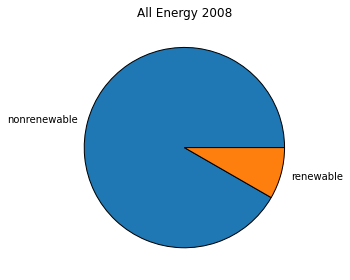

In [194]:
from matplotlib import pyplot as plt 

pie = sum_r_type_08['sum']
labels = ['nonrenewable', 'renewable']

#plt.style.use("fivethirtyeight")

plt.pie(pie, labels=labels, wedgeprops={'edgecolor':'black'})
plt.title("All Energy 2008")
plt.tight_layout()
plt.show()

In [195]:
#filter 2018, group by Commodity, sum of TJ
df_2018 = df_merge[df_merge['Year'] == 2018]
comm_grp_18 = df_2018.groupby(['Commodity'])
sum_2018 = comm_grp_18['TJ'].agg(['sum'])

#same thing for 2008

df_2008 = df_merge[df_merge['Year'] == 2008]
comm_grp_08 = df_2008.groupby(['Commodity'])
sum_2008 = comm_grp_08['TJ'].agg(['sum'])



In [196]:
#change 'sum' heading to TJ 2018, TJ 2008
sum_2018.rename(columns={'sum' : 'Total TJ 2018'}, inplace=True)
sum_2008.rename(columns={'sum' : 'Total TJ 2008'}, inplace=True)

In [197]:
#combine 2018 and 2008 data frames to get percentage change
allsources_change = pd.concat([sum_2008, sum_2018], axis='columns', sort=False)

In [198]:
sum_2018.head()

,Total TJ 2018
Commodity,
additives and oxygenates,1.450680e+05
animal waste,6.828780e+05
anthracite,1.099642e+06
aviation gasoline,7.265971e+04
bagasse,3.575350e+06


In [199]:
import matplotlib.pyplot as plt 

# pc_only = allsources_change.drop(['Total TJ 2018', 'Total TJ 2008', 'change'],axis=1)
# pc_only.sort_values(by='perc_change', ascending=False, inplace=True)
sum_2018.sort_values(by='Total TJ 2018', ascending=False, inplace=True)

#print(sum_2018.plot(kind='bar', figsize=(16,6), title='Energy Production All Sources in 2018'))

sum_2018.head()

,Total TJ 2018
Commodity,
hard coal,1.754725e+08
conventional crude oil,1.676249e+08
natural gas (including lng),1.375063e+08
motor gasoline,4.486999e+07
gas oil/ diesel oil,4.247552e+07


In [200]:
import matplotlib.pyplot as plt 

# pc_only = allsources_change.drop(['Total TJ 2018', 'Total TJ 2008', 'change'],axis=1)
# pc_only.sort_values(by='perc_change', ascending=False, inplace=True)
sum_2008.sort_values(by='Total TJ 2008', ascending=False, inplace=True)
sum_2008.head()
#print(sum_2008.plot(kind='bar', figsize=(16,6), title='Energy Production from All Sources in 2008'))

,Total TJ 2008
Commodity,
conventional crude oil,1.527573e+08
hard coal,1.396133e+08
natural gas (including lng),1.092550e+08
motor gasoline,3.921158e+07
gas oil/ diesel oil,3.845645e+07


In [201]:
allsources_change['change'] = allsources_change['Total TJ 2018'] - allsources_change['Total TJ 2008']
allsources_change['perc_change'] = (allsources_change['change'] / allsources_change['Total TJ 2008']) * 100
allsources_change.sort_values(by='perc_change', ascending=False)

,Total TJ 2008,Total TJ 2018,change,perc_change
Commodity,,,,
solar electricity,4.420592e+04,2.017290e+06,1.973085e+06,4463.394050
wind electricity,7.336391e+05,4.542049e+06,3.808410e+06,519.112207
biodiesel,5.604483e+05,1.762222e+06,1.201774e+06,214.430830
blast furnace gas,2.331718e+06,6.578436e+06,4.246718e+06,182.128304
industrial waste,5.234859e+05,1.133846e+06,6.103603e+05,116.595354
ethane,1.669286e+06,3.503525e+06,1.834238e+06,109.881588
tide electricity,1.713600e+03,3.548937e+03,1.835337e+03,107.104167
other oil products n.e.c.,4.554934e+06,9.227959e+06,4.673025e+06,102.592601
biogases,5.261217e+05,1.019022e+06,4.929002e+05,93.685582


In [202]:
allsources_change.sort_values(by='Total TJ 2008', ascending=False)
# allsources_change.to_csv('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/presentation links/all_sources_change.csv')

AxesSubplot(0.125,0.125;0.775x0.755)


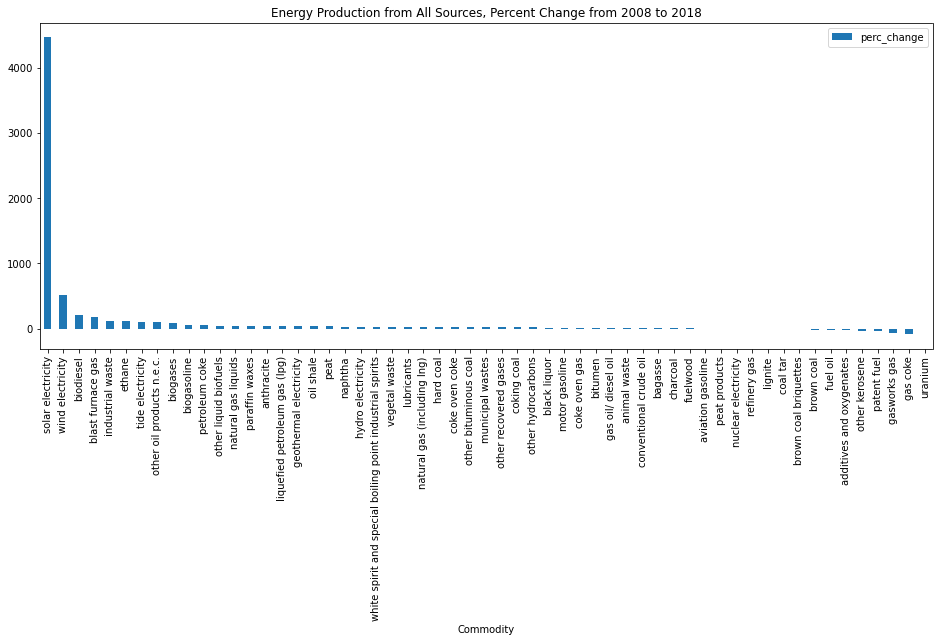

In [203]:
import matplotlib.pyplot as plt 

pc_only = allsources_change.drop(['Total TJ 2018', 'Total TJ 2008', 'change'],axis=1)
pc_only.sort_values(by='perc_change', ascending=False, inplace=True)


print(pc_only.plot(kind='bar', figsize=(16,6), title='Energy Production from All Sources, Percent Change from 2008 to 2018'))

## v.Insights